# <font color = 'pickle'>**HW3 - 15 Points** </font>

1.	For Questions (1, 2 and 3) you will submit two files: a) A colab notebook b) A well formatted PDF file.
2.	The notebook and pdf files should contain all the output.
3. For Question 4 - submit a pdf OR ppt file.
4.	Name the files as follows : FirstName_hw3.ipynb, FirstName_hw3.pdf
5.	If the submission requires multiple files name them as follows: FirstName_file1_hw3, FirstName_file2_hw3.


# <font color = 'pickle'>**Q1. Compute Gradient using  PyTorch Autograd - 2 Points**
## $f(x,y) = \frac{x + \exp(y)}{\log(x) + (x-y)^3}$
Compute dx and dy at x=3 and y=4

In [1]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=bd73f34a605a70379b220f6d66559009b9ad64689cc7725228ab938867269ae4
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [2]:
import math
import torch
from torchviz import make_dot

In [57]:
x = torch.tensor([3.0])
y = torch.tensor([4.0])

In [58]:
x.requires_grad_(True)
y.requires_grad_(True)

tensor([4.], requires_grad=True)

In [59]:
f = (x+(torch.exp(y)))/((torch.log(x))+((x-y)**3))
print(f)

tensor([584.0868], grad_fn=<DivBackward0>)


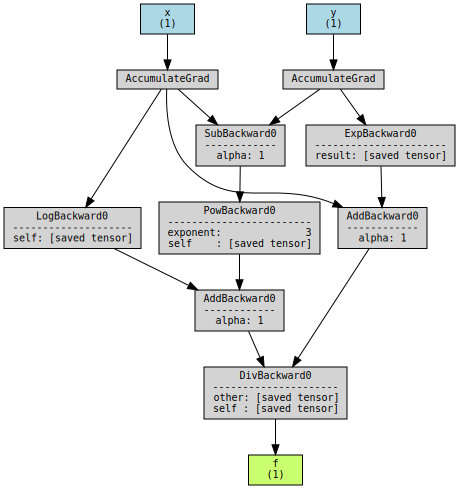

In [60]:
#Making computation graph

make_dot(f, params = {'x':x, 'y':y, 'f':f}, show_attrs = True, show_saved = False)

In [61]:
f.backward()

In [62]:
print(x.grad)
print(y.grad)

tensor([-19733.3965])
tensor([18322.8477])


# <font color = 'pickle'>**Q2. Regression with autogard (backward() method) 5 points** </font>

<font size = 4,  color ='indianred'> **Redo  question 7 from HW1. Now we will use Pytorch's autograd to calculate the gradients instead of manually calculating gradients.**</font>


Imagine that you're trying to figure out relationship between two variables x and y . You have some idea but you aren't quite sure yet whether the dependence is linear or quadratic. 

Your goal is to use least mean squares regression to identify the coefficients for the following three models :

1. Quadratic model where $\mathrm{y} = b + w_1 \cdot \mathrm{x} + w_2 \cdot \mathrm{x}^2$.
1. Linear model where $\mathrm{y} = b + w_1 \cdot \mathrm{x}$.
1. Linear model with no bias  where $\mathrm{y} = w_1 \cdot \mathrm{x}$.


- You will use batch gradient descent to estimate the model co-efficients. Batch gradient descent uses complete training data at each iteration. 
- We will implement only training loop (no splitting of data in to training/validation).
- The training loop will have only one for loop. We need to iterate over whole data in each epoch. We do not need to create batches.
- You may have to try different values of number of epochs/ learning rate to get good results.
- <font color = 'indianred'>**You are not allowed to use Pytorch's nn.module or functions from Pytorch. You will write function for loss function (mean sqaured error), and prediction from scratch.**</font>
- <font color = 'indianred'>**You will not calculate gradients manually. You will use backward() method to compute gradients.**

## <font color = 'pickle'> **Data**

In [9]:
import torch

In [10]:
x = torch.tensor([1.5420291, 1.8935232, 2.1603365, 2.5381863, 2.893443, \
                    3.838855, 3.925425, 4.2233696, 4.235571, 4.273397, \
                    4.9332876, 6.4704757, 6.517571, 6.87826, 7.0009003, \
                    7.035741, 7.278681, 7.7561755, 9.121138, 9.728281])
y = torch.tensor([63.802246, 80.036026, 91.4903, 108.28776, 122.781975, \
                    161.36314, 166.50816, 176.16772, 180.29395, 179.09758, \
                    206.21027, 272.71857, 272.24033, 289.54745, 293.8488, \
                    295.2281, 306.62274, 327.93243, 383.16296, 408.65967])

In [11]:
y = y.view(-1,1)
x = x.view(-1,1)
x2 = x * x

In [12]:
x_combined = torch.cat((x,x2), dim = 1)

In [13]:
#Model - Linear Regresssion

def linear_regression(x,w,b, bias):
  if bias:
    return torch.mm(x,w.T) + b
  else:
    return torch.mm(x,w.T)

In [14]:
#Loss Function

def mean_square_loss(y, yhat):
  error = yhat - y
  sum_square_loss = error.T@error
  return sum_square_loss/len(y)


In [28]:
#Updating the parameters

def sgd_step(params, param_grads, learning_rate):
  for param, param_grad in zip(params, param_grads):
    param -= learning_rate*param_grad

In [49]:
#Train Loop

def train(epochs, x,y, n_outs, bias, loss_function, log_interval, learning_rate):
  loss_epoch = []
  n_ins = x.shape[-1]
  w = torch.normal(0, 0.01, size=(n_outs, n_ins), requires_grad=True)
  b = torch.zeros(n_outs, requires_grad=True)
  if bias:
    params = (w, b)
  else:
    params = w

  for epoch in range(epochs):
    
    # Step1: forward pass
    y_hat = linear_regression(x, w, b, bias)

    # Step2 : Loss
    loss = loss_function(y_hat, y)
    loss.backward()

    #Calculate Gradients
    if bias:
      param_grads = (w.grad,b.grad)
    else:
      param_grads = w.grad

    # Update parameters
    with torch.no_grad():
      sgd_step(params, param_grads, learning_rate)  
   
    if bias:
      w.grad.zero_()
      b.grad.zero_()
    else:
      w.grad.zero_()

    if(epoch % log_interval ==0):
      print(f'epoch: {epoch + 1} --> loss {loss.item()}')

  return (w, b)

##Model 1 - Training and Checking results

In [50]:
# Model 1  
loss_function = mean_square_loss
LEARNING_RATE = 0.0005
EPOCHS = 100000
LOG_INTERVAL= 10000
N_OUTS = 1
BIAS = True

w1, b1 = train(EPOCHS, x_combined, y,  N_OUTS, BIAS, loss_function, LOG_INTERVAL, LEARNING_RATE)

epoch: 1 --> loss 57724.1640625
epoch: 10001 --> loss 5.004037380218506
epoch: 20001 --> loss 3.0955586433410645
epoch: 30001 --> loss 2.137913227081299
epoch: 40001 --> loss 1.6573288440704346
epoch: 50001 --> loss 1.4161760807037354
epoch: 60001 --> loss 1.294985055923462
epoch: 70001 --> loss 1.2341334819793701
epoch: 80001 --> loss 1.2036077976226807
epoch: 90001 --> loss 1.1882108449935913


In [51]:
print(f' Weights {w1}, \nBias: {b1}')

 Weights tensor([[4.1796e+01, 1.4833e-02]], requires_grad=True), 
Bias: tensor([0.9774], requires_grad=True)


In [52]:
#Model 2

loss_function = mean_square_loss
LEARNING_RATE = 0.01
EPOCHS = 1000
LOG_INTERVAL = 100
N_OUTS = 1
BIAS = True

w2,b2 = train(EPOCHS, x, y, N_OUTS, BIAS, loss_function, LOG_INTERVAL, LEARNING_RATE)

epoch: 1 --> loss 57908.51171875
epoch: 101 --> loss 4.353393077850342
epoch: 201 --> loss 2.8058464527130127
epoch: 301 --> loss 2.0112340450286865
epoch: 401 --> loss 1.6032235622406006
epoch: 501 --> loss 1.3937246799468994
epoch: 601 --> loss 1.2861621379852295
epoch: 701 --> loss 1.2309223413467407
epoch: 801 --> loss 1.2025630474090576
epoch: 901 --> loss 1.188001275062561


In [53]:
print(f' Weights {w2}, \nBias: {b2}')

 Weights tensor([[41.9377]], requires_grad=True), 
Bias: tensor([0.7466], requires_grad=True)


In [54]:
#Model 3

loss_function = mean_square_loss
LEARNING_RATE = 0.01
EPOCHS = 10
LOG_INTERVAL = 1
N_OUTS = 1
BIAS = False

w3, b3 = train(EPOCHS, x, y,  N_OUTS, BIAS, loss_function, LOG_INTERVAL, LEARNING_RATE)

epoch: 1 --> loss 57962.7734375
epoch: 2 --> loss 6895.7265625
epoch: 3 --> loss 821.3201293945312
epoch: 4 --> loss 98.77147674560547
epoch: 5 --> loss 12.824447631835938
epoch: 6 --> loss 2.601112127304077
epoch: 7 --> loss 1.3850189447402954
epoch: 8 --> loss 1.2403712272644043
epoch: 9 --> loss 1.223166584968567
epoch: 10 --> loss 1.2211220264434814


In [55]:
print(f' Weights {w3}, \nBias: {b3}')

 Weights tensor([[42.0557]], requires_grad=True), 
Bias: tensor([0.], requires_grad=True)


# <font color = 'pickle'>**Q 3. Numerical Precision - 3 Points**

Given scalars `x` and `y`, implement the following `log_exp` function such that it returns 
$$-\log\left(\frac{e^x}{e^x+e^y}\right)$$.

In [65]:
#Question
def log_exp(x, y):
    return -torch.log(torch.exp(x)/(torch.exp(x) + torch.exp(y)))

Test your codes with normal inputs:

In [66]:
x, y = torch.tensor([2.0]), torch.tensor([3.0])
z = log_exp(x, y)
z

tensor([1.3133])

Now implement a function to compute $\partial z/\partial x$ and $\partial z/\partial y$ with `autograd`

In [67]:
# function should print the gradients dx and dy 
def grad(forward_func, x, y): 
  
  x.requires_grad_()
  y.requires_grad_()
  z = forward_func(x,y)
  z.backward()
  
  print("x.grad = ", x.grad)
  print("y.grad = ", y.grad)
  x.grad.data.zero_()
  y.grad.data.zero_()


Test your codes, it should print the results nicely. 

In [68]:
grad(log_exp, x, y)

x.grad =  tensor([-0.7311])
y.grad =  tensor([0.7311])


But now let's try some "hard" inputs

In [69]:
x, y = torch.tensor([50.0]), torch.tensor([100.0])

In [70]:
grad(log_exp, x, y)

x.grad =  tensor([nan])
y.grad =  tensor([nan])


In [71]:
torch.exp(torch.tensor([100.0]))

tensor([inf])

Does your code return correct results? If not, try to understand the reason. (Hint, evaluate `exp(100)`). Now develop a new function `stable_log_exp` that is identical to `log_exp` in math, but returns a more numerical stable result.
<br> Hint: (1) $\log\left(\frac{x}{y}\right) = log ({x}) -log({y})$
<br> Hint: (2) See logsum Trick - https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/

In [73]:
#Simplification of the expression is attached in PDF file
#Used 2 hints - log(x/y) = log(x)-log(y) and log(a+b) = log(a) + log(1+(b/a))



def stable_log_exp(x, y):
    return torch.log(1+ torch.exp(y-x))


In [74]:
grad(stable_log_exp, x, y)

x.grad =  tensor([-1.])
y.grad =  tensor([1.])


# <font color = 'pickle'>**Q4 : Manual Backpropogation (5 Points)**

For the network below update the weights using back propogation. 

<img src = "https://drive.google.com/uc?export=view&id=1e1EI-N773mUtQJ0SQx5wlJJ1RaIQ4dZ2" width =600 >

- X1, x2 are inputs. The values of the inputs are provided.
- h1, h2 are hidden neurons. You will need to calculate the values of h1 and h2 in forward pass.
- o1 and o2 are outputs. 0.01 and 0.99 are the true values of the output. You will calculate the predicted values of o1 and o1 in forward pass.
- W1-W8 are weights. The initial values are provided to you. You will need to calculate the updated values in backward pass.
- bh1, bh2, bo1, bo2 are bias terms. The initial values are provided. You will need to calculate the updated values in backward pass.

- You will apply sigmoid activation on hidden layer.
- You will apply Linear activation function on output neurons.
- You will use the  squared error as the loss function. 
where <br>$ E_1 =1/2 *(\hat{o_1}-o_1)^2 $ <br> 
$ E_2 =1/2 *(\hat{o_2}-o_2)^2 $ <br>  $ E = E_1 + E_2$

Here $E$ is the total loss. $\hat{o_2}$ and $\hat{o_2}$ are predicted values of $o_1$ and $o_2$.
 
- <font color ='indianred'> **Assume a Learning Rate of 10.**
    

<font color ='indianred'> **Requirements**
- Show caluclations for one forward and one backward pass.
- Show all the steps of your calculations. You will get partial credit for the steps even if the final answers are not accurate.
- You will do this question manually.
- For this question you can submit - ppt  or pdf file (pdf of handwritten calculations).